# Example Usage 
## Embedder
## Evaluator
## Graph_generator

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

from embedder import Embedder
from embedder import Model
from evaluator import Evaluator

from graph_generator import Graph_Generator

### Generate graphs and split it

In [22]:
from load_data import load_data
graphs, labels = load_data("MUTAG")

# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

### Import the models 

In [23]:
from sklearn.decomposition import TruncatedSVD
from eden import graph
import umap

# MUTAG
Using 3 models:  
1) Vectorize  
2) PCA to 1000  
3) UMAP to dim = {2,4,8,16,32,..}

The entrire porcedure is repeated 5 times

In [24]:
dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]

n_repeat = 5
for k in range(0,n_repeat):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder([model1,model2,model3])
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1


loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5


[24, 33]
Dimensions:  [ 2.  4.  8. 16. 32.]
Procedure repated:  5

Train set size:  131
Test set size:  57

metrics differents dimensions:
	 mean Accuracy 0.6338666666666667
	 mean Precision 0.7374476190476189
	 mean Recall 0.6473333333333333
	 mean F1 0.660376911976912


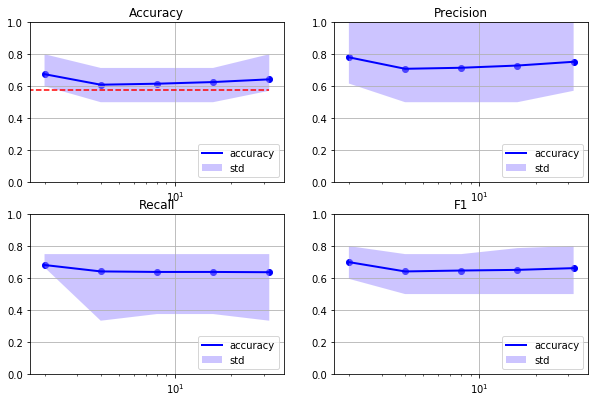

In [25]:
my_plot(accuracy,precision,recall,f1,dim,n_repeat,len(X_train),len(X_test),y_test)

# Artificial Graphs

## Hard to split

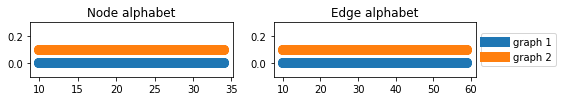

In [12]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=15,dept_g2=15,
                                 plot = True)


loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5
Dimensions:  [ 2.  4.  8. 16. 32.]
Procedure repated:  5

Train set size:  700
Test set size:  300

metrics differents dimensions:
	 mean Accuracy 0.4809684835001854
	 mean Precision 0.4999006191434983
	 mean Recall 0.4793666666666666
	 mean F1 0.4862731119894936


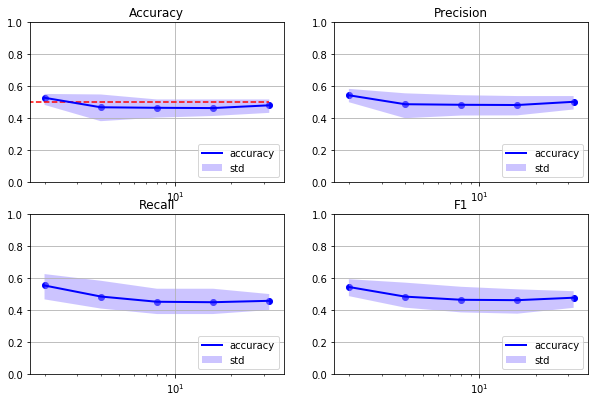

In [13]:
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]

n_repeat = 5
for k in range(0,n_repeat):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder([model1,model2,model3])
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1

my_plot(accuracy,precision,recall,f1,dim,n_repeat,len(X_train),len(X_test),y_test)

## Easy to split

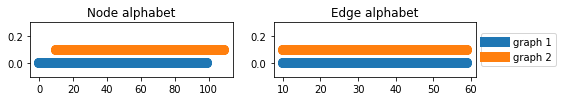

loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5
Dimensions:  [ 2.  4.  8. 16. 32.]
Procedure repated:  5

Train set size:  700
Test set size:  300

metrics differents dimensions:
	 mean Accuracy 0.7337816833518723
	 mean Precision 0.7526659405953524
	 mean Recall 0.7360166666666667
	 mean F1 0.7390479420226683


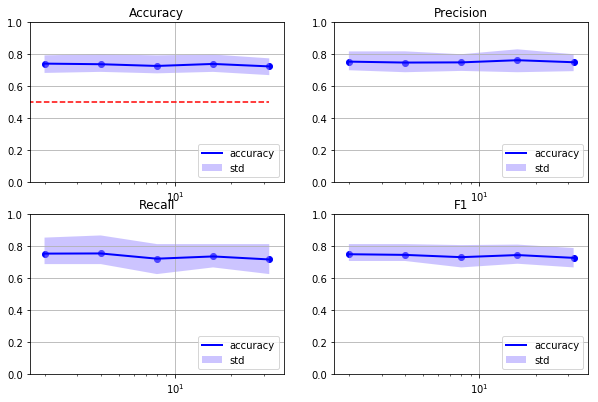

In [14]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 0,
                                          edge_alph_start = 10,
                                          node_alph_end = 100)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10,
                                          node_alph_end = 110)

graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=15,dept_g2=15,
                                 plot = True)

# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]

n_repeat = 5
for k in range(0,n_repeat):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder([model1,model2,model3])
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1

my_plot(accuracy,precision,recall,f1,dim,n_repeat,len(X_train),len(X_test),y_test)

[144, 156]
Dimensions:  [ 2.  4.  8. 16. 32.]
Procedure repated:  5

Train set size:  700
Test set size:  300

metrics differents dimensions:
	 mean Accuracy 0.7337816833518723
	 mean Precision 0.7526659405953524
	 mean Recall 0.7360166666666667
	 mean F1 0.7390479420226683


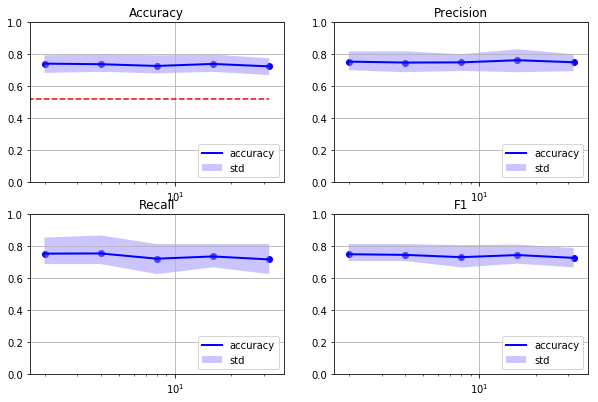

In [19]:
my_plot(accuracy,precision,recall,f1,dim,n_repeat,len(X_train),len(X_test),y_test)

[144, 156]


In [18]:
import matplotlib.pyplot as plt

def my_plot(accuracy,precision,recall,f1,dim,repeat,size_train,size_test,y_test):
    acc_mean, acc_std, acc_25, acc_75 = mean_std(accuracy)
    pre_mean, pre_std, pre_25, pre_75 = mean_std(precision)
    rec_mean, rec_std, rec_25, rec_75 = mean_std(recall)
    f1_mean, f1_std, f1_25, f1_75 = mean_std(f1)
    
    y_balance = [0,0]
    for i in y_test:
        if (i == 0):
            y_balance[0] = y_balance[0] + 1
        else:
            y_balance[1] = y_balance[1] + 1

    print("Dimensions: ",dim)
    print("Procedure repated: ", repeat)
    print("")
    print("Train set size: ",size_train)
    print("Test set size: ",size_test)
    
    print("")
    print("metrics differents dimensions:")
    print("\t mean Accuracy", np.mean(acc_mean))
    print("\t mean Precision", np.mean(pre_mean))
    print("\t mean Recall", np.mean(rec_mean))
    print("\t mean F1", np.mean(f1_mean))

    plt.figure(1, figsize=(10,10))

    plt.subplot(321)
    plt.title("Accuracy")
    # the 1 sigma upper and lower analytic population bounds
    lower_bound = acc_25
    upper_bound = acc_75

    plt.semilogx(dim, acc_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, acc_mean, color='blue')
    
    base_line = max(y_balance)/np.sum(y_balance)
    
    plt.hlines(base_line, 0, dim[-1], color='red',linestyles= 'dashed')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='#9B8BFF', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    plt.ylim(0,1)
    plt.grid()



    plt.subplot(322)
    plt.title("Precision")
    # the 1 sigma upper and lower analytic population bounds
    lower_bound = pre_25
    upper_bound = pre_75

    plt.semilogx(dim, pre_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, pre_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='#9B8BFF', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(pre_mean)-max(pre_std)
    plt.ylim(0,1)
    plt.grid()


    plt.subplot(323)
    plt.title("Recall")
    lower_bound = rec_25
    upper_bound = rec_75

    plt.semilogx(dim, rec_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, rec_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='#9B8BFF', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(rec_mean)-max(rec_std)
    plt.ylim(0,1)
    plt.grid()

    plt.subplot(324)
    plt.title("F1")
    lower_bound = f1_25    
    upper_bound = f1_75

    plt.semilogx(dim, f1_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, f1_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='#9B8BFF', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(f1_mean)-max(f1_std)
    plt.ylim(0,1)
    plt.grid()

    
def mean_std(metric):
    mean_res = []
    std_res = []
    per_25 = []
    per_75 = []
    for i in metric:
        mean_res.append(np.mean(i))
        std_res.append(np.std(i))
        per_25.append(np.percentile(i,25))
        per_75.append(np.percentile(i,75))
    
    mean_res = np.array(mean_res)
    std_res = np.array(std_res)
    per_25 = np.array(per_25)
    per_75 = np.array(per_75)
        
    return (mean_res, std_res,per_25, per_75)